In [171]:
import numpy as np
import pandas as pd
import os

np.random.seed(165)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

path="C:\\Users\jsciamma\Documents\Patrick\ML\Kaggle\HousePrices"
#path="C:\\Users\\Patrick\ML\HousePrices"
os.chdir(path)
os.getcwd()

train = pd.read_csv("data\\train.csv")
test = pd.read_csv("data\\test.csv")

In [114]:
traintrain=train.sample(frac=0.8,random_state=200)
traintest=train.drop(traintrain.index)
?train.sample()

In [172]:
train.reset_index(inplace=True)
test.reset_index(inplace=True)
test.head()
train.set_index('Id', inplace=True)
test.set_index('Id', inplace=True)
traintrain=train.sample(frac=0.8,random_state=200)
traintest=train.drop(traintrain.index)
train.loc[traintrain.index, 'Set']='traintrain'
train.loc[traintest.index,'Set']='traintest'
test['Set']='test'


## count variables

In [173]:
def correct_count_variables():
    count_variables = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
                       'GarageCars', 'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                      'YearBuilt', 'YearRemodAdd']
    full.loc[full.BsmtFullBath.isnull(), 'BsmtFullBath'] = 0
    full.loc[full.BsmtHalfBath.isnull(), 'BsmtHalfBath'] = 0
    full.loc[full.GarageCars.isnull(), 'GarageCars'] = 0
    return count_variables

## convert some categories to main distinguishing feature

In [174]:
def convert_to_binary():
    full['Bin_SaleCondition_Partial'] = (full.SaleCondition == 'Partial').astype(int)
    full['Bin_SaleType_New'] = (full.SaleType == 'New').astype(int)
    full['Bin_Condition_Artery'] = ((full.Condition1 == 'Artery') | (full.Condition2 == 'Artery')).astype(int)
    full['Bin_Functional_Typ'] = (full.Functional == 'Typ').astype(int)
    full['Bin_CentralAir_Y'] = (full.CentralAir == 'Y').astype(int)
    full['Bin_Electrical'] = (full.Electrical == 'SBrkr').astype(int)
    full['Bin_Heating'] = (full.Heating == 'GasA').astype(int)
    full['Bin_LandContour'] = (full.LandContour == 'Bnk').astype(int)
    return ['SaleCondition', 'SaleType', 'Condition1', 'Condition2', 'Functional', 'CentralAir',
           'Electrical', 'Heating', 'LandContour'], list(full.filter(regex='Bin_').columns)

## convert surface to ratios (as we are solving for price per sq ft

In [175]:
def convert_surfaces():
    surfaces = (list(full.filter(regex='SF').columns) + 
                ['LotArea','MasVnrArea','GarageArea','EnclosedPorch',
                 '3SsnPorch','ScreenPorch','PoolArea', 'LotFrontage'])
    # replace NAs with 0s where correct
    for c in surfaces:
        full.loc[np.isnan(full[c]), c] = 0
    # create surface ratio to GrLiveArea
    for c in surfaces:
        full["prop_" + c] = full[c] / full.GrLivArea
    return surfaces, ["prop_" + c for c in surfaces]

## convert quality indicators

In [176]:
# convert quality indicators to a linear scale
def convert_quality():
    for c in ['Street', 'GarageQual', 'GarageCond', 'LotShape', 'LandSlope', 'ExterQual', 
              'ExterCond', 'BsmtCond', 'BsmtQual', 'HeatingQC', 'KitchenQual', 
              'FireplaceQu', 'GarageFinish', 'BsmtFinType1', 'BsmtFinType2']:
        full.loc[full[c].isnull(), c] = 'NA'
    cleanup_nums = {
        "GarageQual":     {"NA" : 0, "Po": 1, "Fa": 2, "TA": 3, "Gd" : 4, "Ex" : 5},
        "GarageCond":     {"NA" : 0, "Po": 1, "Fa": 2, "TA": 3, "Gd" : 4, "Ex" : 5},
        "LotShape":     {"Reg" : 0, "IR1": 1, "IR2": 2, "IR3": 3},
        "LandSlope":     {"Gtl" : 0, "Mod": 1, "Sev": 2},
        "ExterQual":     {"NA" : 0, "Po": 1, "Fa": 2, "TA": 3, "Gd" : 4, "Ex" : 5},
        "ExterCond":     {"NA" : 0, "Po": 1, "Fa": 2, "TA": 3, "Gd" : 4, "Ex" : 5},
        "BsmtCond":     {"NA" : 0, "Po": 1, "Fa": 2, "TA": 3, "Gd" : 4, "Ex" : 5},
        "BsmtQual":     {"NA" : 0, "Po": 1, "Fa": 2, "TA": 3, "Gd" : 4, "Ex" : 5},
        "HeatingQC":     {"Po": 1, "Fa": 2, "TA": 3, "Gd" : 4, "Ex" : 5},
        "KitchenQual":     {"NA" : 0,"Po": 1, "Fa": 2, "TA": 3, "Gd" : 4, "Ex" : 5},
        "FireplaceQu":     {"NA" : 0,"Po": 1, "Fa": 2, "TA": 3, "Gd" : 4, "Ex" : 5},
        "GarageFinish":     {"NA" : 0,"Unf": 1, "RFn": 2, "Fin": 3},
        "BsmtFinType1":     {"NA" : 0,"Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ":5, "GLQ":6},
        "BsmtFinType2":     {"NA" : 0,"Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ":5, "GLQ":6},
    }
    full.replace(cleanup_nums, inplace=True)
    return ['GarageQual', 'GarageCond', 'LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 
            'BsmtCond', 'BsmtQual', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageFinish',
            'BsmtFinType1', 'BsmtFinType2', 'OverallCond', 'OverallQual']
        


## put it all together

In [177]:
full = pd.concat([train, test], )
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 82 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [178]:

count_variables = correct_count_variables()
drop_binary_variables, binary_variables = convert_to_binary()
drop_surface_variables, surface_variables = convert_surfaces()
quality_variables = convert_quality()
full['SalePricePerSqft'] = full.SalePrice / (full.GrLivArea)
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Columns: 108 entries, 1stFlrSF to SalePricePerSqft
dtypes: float64(30), int32(8), int64(40), object(30)
memory usage: 2.3+ MB


In [179]:
def print_info():
    for c in [count_variables, binary_variables, surface_variables, quality_variables]:
        print(full[c].info())
#print_info()

In [180]:
newfields = count_variables + quality_variables + binary_variables + surface_variables
oldfields = drop_binary_variables + drop_surface_variables
#full.drop(newfields + oldfields, axis=1).info()


## add variables

In [181]:
def create_cross_variables(x, y):
    full[x + '_x_' + y] = full[x] * full[y]
create_cross_variables('prop_TotalBsmtSF', 'BsmtQual')
create_cross_variables('prop_TotalBsmtSF', 'BsmtCond')
create_cross_variables('prop_LotArea', 'LotShape')
create_cross_variables('prop_LotArea', 'LandSlope')
create_cross_variables('prop_BsmtFinSF1', 'BsmtFinType1')
create_cross_variables('prop_BsmtFinSF2', 'BsmtFinType2')
create_cross_variables('prop_GarageArea', 'GarageQual')
create_cross_variables('prop_GarageArea', 'GarageCond')

cross_variables = full.filter(regex='_x_').columns
full[cross_variables].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 8 columns):
prop_TotalBsmtSF_x_BsmtQual       2919 non-null float64
prop_TotalBsmtSF_x_BsmtCond       2919 non-null float64
prop_LotArea_x_LotShape           2919 non-null float64
prop_LotArea_x_LandSlope          2919 non-null float64
prop_BsmtFinSF1_x_BsmtFinType1    2919 non-null float64
prop_BsmtFinSF2_x_BsmtFinType2    2919 non-null float64
prop_GarageArea_x_GarageQual      2919 non-null float64
prop_GarageArea_x_GarageCond      2919 non-null float64
dtypes: float64(8)
memory usage: 205.2 KB


## dummy variables

In [182]:
drop_dummies=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotConfig', 
              'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
             'Foundation']
d = pd.get_dummies(full[drop_dummies], columns = drop_dummies, prefix='d')
dummy_columns = list(d.columns)
full = pd.concat([full, d], axis=1)

## set up fields and training set

In [183]:
fields = newfields + list(cross_variables) + dummy_columns
X = full.loc[full.Set=='traintrain', fields]
y = full.loc[full.Set=='traintrain', 'SalePricePerSqft']

In [158]:
full[fields].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Columns: 215 entries, BsmtFullBath to d_Wood
dtypes: float64(28), int32(8), int64(24), uint8(155)
memory usage: 1.7 MB


## linear regression

In [184]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error



simple_lin_reg=LinearRegression()
simple_lin_reg.fit(X, y)
print("score on training set", simple_lin_reg.score(X, y))
print("mean squared error on training set", np.sqrt(mean_squared_log_error(y, simple_lin_reg.predict(X))))
mean_squared_error
a = np.sqrt(-cross_val_score(simple_lin_reg, X, y, cv=10, scoring='neg_mean_squared_log_error'))
print("cross val score", a)
print("mean cross val score", a.mean())

score on training set 0.842486852661
mean squared error on training set 0.114020957579
cross val score [ 0.38337425  0.10882769  0.13321556  0.19151148  0.16439976  0.10641981
  0.21212248  0.10619169  0.20020612  0.14523998]
mean cross val score 0.175150882964


In [190]:
X[np.square(np.log(y)-np.log(simple_lin_reg.predict(X)))>0.5]

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,GarageCars,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,YearBuilt,...,d_BrkTil,d_CBlock,d_CBlock,d_CBlock,d_PConc,d_Slab,d_Stone,d_Stone,d_Stone,d_Wood
Id,,,,,,,,,,,,,,,,,,,,,
89,0.0,0.0,1,0,0.0,2,1,6,0,1915,...,0,0,0,1,0,0,0,0,0,0
524,1.0,0.0,3,1,3.0,3,1,11,1,2007,...,0,0,0,0,1,0,0,0,0,0
633,0.0,0.0,2,0,2.0,3,1,6,1,1977,...,0,0,0,1,0,0,0,0,0,0


## Helper functions

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

def training_diagnostics(model):
    print("score on training set", model.score(X, y))
    print("mean squared error on training set", np.sqrt(mean_squared_log_error(y, model.predict(X))))

def cv_diagnostics(model):
    a = np.sqrt(-cross_val_score(model, X, y, cv=10, scoring="neg_mean_squared_log_error"))
    print("cross val score", a)
    print("mean cross val score", a.mean())

## Ridge Regression

In [160]:
from sklearn.linear_model import Ridge

ridge_reg = Pipeline([
    ('std_scaler', StandardScaler()),
    ('ridge_reg', Ridge()),
])
ridge_reg.set_params(ridge_reg__alpha=230, ridge_reg__solver="cholesky").fit(X, y)
training_diagnostics(ridge_reg)


score on training set 0.827070217943
mean squared error on training set 0.116418751743


In [161]:
cv_diagnostics(ridge_reg)

cross val score [ 0.14097718  0.10600405  0.12916854  0.18304956  0.14678685  0.10732711
  0.17933932  0.10901533  0.19326701  0.13378144]
mean cross val score 0.142871639057


In [162]:
# cross validated grid search
parameters = {'ridge_reg__alpha':[230, 240, 250, 260],
             }
ridge_reg_CV = GridSearchCV(ridge_reg, parameters, scoring = 'neg_mean_squared_log_error', cv=10).fit(X, y)
print(ridge_reg_CV.best_estimator_)
print(np.sqrt(-ridge_reg_CV.best_score_))


Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge_reg', Ridge(alpha=260, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001))])
0.145669478741


In [210]:
i =np.square(np.log(y)-np.log(ridge_reg.predict(X)))>0.5
print(y[i], ridge_reg.predict(X)[i])
full.loc[524]
train.loc[524][50:]
#full.loc[full.Neighborhood=='Edwards', 'SalePricePerSqft'].hist()

Id
524    39.510265
633    58.469171
Name: SalePricePerSqft, dtype: float64 [ 140.46111738  124.50450989]


HalfBath                  1
BedroomAbvGr              3
KitchenAbvGr              1
KitchenQual              Ex
TotRmsAbvGrd             11
Functional              Typ
Fireplaces                1
FireplaceQu              Gd
GarageType          BuiltIn
GarageYrBlt            2007
GarageFinish            Fin
GarageCars                3
GarageArea              884
GarageQual               TA
GarageCond               TA
PavedDrive                Y
WoodDeckSF              208
OpenPorchSF             406
EnclosedPorch             0
3SsnPorch                 0
ScreenPorch               0
PoolArea                  0
PoolQC                  NaN
Fence                   NaN
MiscFeature             NaN
MiscVal                   0
MoSold                   10
YrSold                 2007
SaleType                New
SaleCondition       Partial
SalePrice            184750
Set              traintrain
Name: 524, dtype: object

## explain outlier

In [227]:
full['DateSold'] = pd.to_datetime((full.YrSold*10000+full.MoSold*100+1).apply(str),format='%Y%m%d')
full['QuarterSold'] = pd.to_datetime((full.YrSold*10000+(((full.MoSold-1)//3)*3+1)*100+1).apply(str),format='%Y%m%d')
full.QuarterSold.value_counts()

2008-04-01    252
2007-04-01    245
2010-04-01    232
2009-04-01    229
2007-07-01    221
2006-04-01    218
2009-07-01    216
2006-07-01    205
2008-07-01    187
2007-10-01    114
2007-01-01    112
2009-10-01    111
2006-10-01    103
2010-01-01     99
2006-01-01     93
2008-01-01     92
2008-10-01     91
2009-01-01     91
2010-07-01      8
Name: QuarterSold, dtype: int64

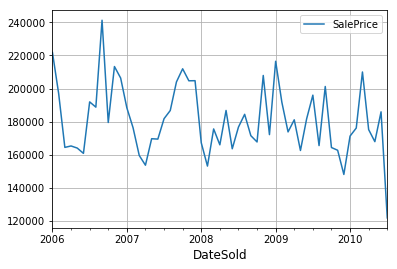

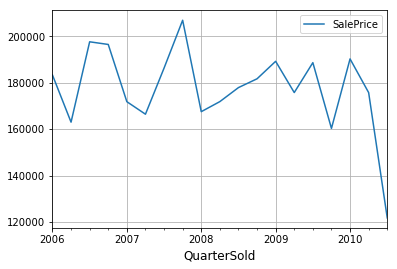

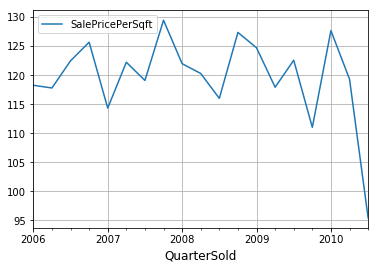

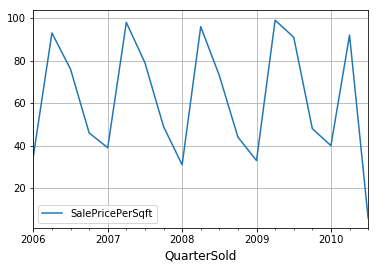

In [236]:
full[full.Set=='traintrain'].groupby('DateSold').agg(np.mean).plot(y = 'SalePrice', grid=True)
full[full.Set=='traintrain'].groupby('QuarterSold').agg(np.mean).plot(y = 'SalePrice', grid=True)
full[full.Set=='traintrain'].groupby('QuarterSold').agg(np.mean).plot(y = 'SalePricePerSqft', grid=True)
full[full.Set=='traintrain'].groupby('QuarterSold').count().plot(y = 'SalePricePerSqft', grid=True)


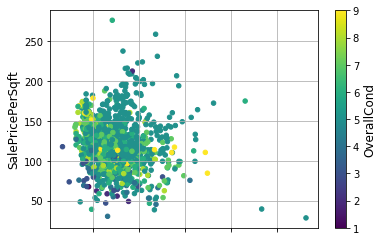

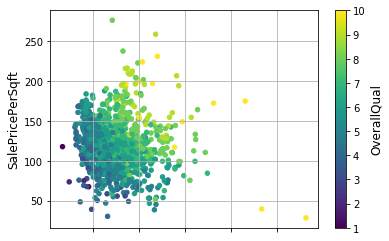

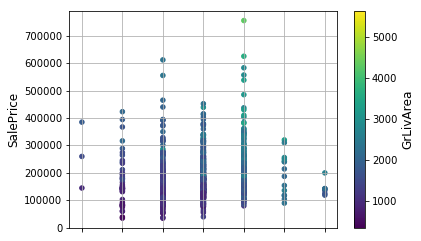

In [248]:
full[full.Set=='traintrain'].plot(kind='scatter', x = 'GrLivArea', y = 'SalePricePerSqft', grid=True,
                                 c='OverallCond', colormap='viridis')
full[full.Set=='traintrain'].plot(kind='scatter', x = 'GrLivArea', y = 'SalePricePerSqft', grid=True,
                                 c='OverallQual', colormap='viridis')
full[full.Set=='traintrain'].plot(kind='scatter', x = 'BedroomAbvGr', y = 'SalePrice', grid=True,
                                 c='GrLivArea', colormap='viridis')
#TODO : convert zoning to number and plot

## Elastic Net

In [47]:
from sklearn.linear_model import ElasticNet

elastic_net = Pipeline([
    ('std_scaler', StandardScaler()),
    ('elastic_net', ElasticNet()),
])
elastic_net.set_params(elastic_net__alpha=0.1, elastic_net__l1_ratio=0.5).fit(X, y)
training_diagnostics(elastic_net)

score on training set 0.816026427581
mean squared error on training set 0.119028514358


In [48]:
cv_diagnostics(elastic_net)

cross val score [ 0.14537626  0.1106752   0.10743537  0.12326948  0.17268115  0.14870673
  0.12700872  0.1006512   0.13693605  0.10198458]
mean cross val score 0.127472473516


In [46]:
# cross validated grid search
parameters = {'elastic_net__alpha':[0.05, 0.1, 1, 10],'elastic_net__l1_ratio':[0.01, 0.25, 0.5, 0.75, 1]
             }
elastic_net_CV = GridSearchCV(elastic_net, parameters, scoring = 'neg_mean_squared_log_error', cv=10).fit(X, y)
print(elastic_net_CV.best_estimator_)
print(np.sqrt(-elastic_net_CV.best_score_))


Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('elastic_net', ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))])
0.129423658413


## Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
#rf = Pipeline([
#    ('std_scaler', StandardScaler()),
#    ('rf', RandomForestRegressor()),
#])
rf = RandomForestRegressor()
#rf.set_params(rf__n_estimators=100, rf__max_features='sqrt', rf__oob_score =True).fit(X, y)
rf.set_params(n_estimators=100, max_features='sqrt', criterion='mae').fit(X, y)
training_diagnostics(rf)
#print(rf.oob_score_)

score on training set 0.956696502694
mean squared error on training set 0.0789173062824


In [86]:
#rf.feature_importances_
sorted(list(zip(X.columns, rf.feature_importances_)), key=lambda tup: tup[1], reverse=True)

[('prop_TotalBsmtSF_x_BsmtQual', 0.073585839836267569),
 ('prop_TotalBsmtSF_x_BsmtCond', 0.060642917625375353),
 ('YearBuilt', 0.053339389166668749),
 ('prop_BsmtFinSF1_x_BsmtFinType1', 0.048554517957543106),
 ('YearRemodAdd', 0.042075426764247047),
 ('prop_GarageArea', 0.041418547624407769),
 ('prop_GarageArea_x_GarageQual', 0.038153736094577624),
 ('prop_TotalBsmtSF', 0.036783523592620847),
 ('prop_2ndFlrSF', 0.035353862631313293),
 ('prop_GarageArea_x_GarageCond', 0.032550121805549503),
 ('BsmtFinType1', 0.026694099892317146),
 ('prop_LotArea', 0.025982023024314453),
 ('prop_BsmtFinSF1', 0.025692641052400614),
 ('OverallQual', 0.024948822646195596),
 ('prop_BsmtUnfSF', 0.022802026252265618),
 ('prop_1stFlrSF', 0.021724306838510437),
 ('prop_LotFrontage', 0.019573718431358012),
 ('KitchenQual', 0.019227960695520227),
 ('TotRmsAbvGrd', 0.017874666657384367),
 ('prop_OpenPorchSF', 0.016679117225095783),
 ('ExterQual', 0.015750552713955777),
 ('BsmtQual', 0.015659760547643783),
 ('prop_

In [87]:
cv_diagnostics(rf)

cross val score [ 0.18166633  0.14577137  0.16271266  0.13735461  0.35509774  0.17704349
  0.13648783  0.16281719  0.12944544  0.16418586]
mean cross val score 0.175258253536


In [414]:
# cross validated grid search
parameters = {'max_features':[0.1, 0.25, 0.5, 0.75],
              'max_depth':[2, 3, 10, 20]
             }
rf_CV = GridSearchCV(rf, parameters, scoring = 'neg_mean_squared_log_error').fit(X, y)
print(rf_CV.best_estimator_)
print(np.sqrt(-rf_CV.best_score_))


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
0.141912477685


## SVM

In [54]:
from sklearn.svm import LinearSVR
svm_reg = Pipeline([
    ('std_scaler', StandardScaler()),
    ('svm_reg', LinearSVR()),
])
# use epsilon=0.11, C=.7 from grid search below
svm_reg.set_params(svm_reg__epsilon=0.01, svm_reg__C=.8).fit(X, y)


Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_reg', LinearSVR(C=0.8, dual=True, epsilon=0.01, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])

In [55]:
print("score on training set", svm_reg.score(X, y))
print("mean squared error on training set", np.sqrt(mean_squared_error(y, svm_reg.predict(X))))
a = np.sqrt(-cross_val_score(svm_reg, X, y, cv=10, scoring="neg_mean_squared_log_error"))
print("cross val score", a)
print("mean cross val score", a.mean())


score on training set 0.807391226384
mean squared error on training set 13.5580651918
cross val score [ 0.26658581  0.1144506   0.09950504  0.12534135  0.16863235  0.15528713
  0.13198678  0.10107107  0.13943193  0.10249346]
mean cross val score 0.140478553462


## svm, cross validated grid search

In [56]:
from sklearn.model_selection import GridSearchCV
parameters = {'svm_reg__epsilon':[0.009, 0.1, 0.11],
             'svm_reg__C':[0.5, 0.6, 0.7, 0.8]}
svm_reg_CV = GridSearchCV(svm_reg, parameters, scoring = 'neg_mean_squared_log_error', cv=10)
svm_reg_CV.fit(X, y)


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_reg', LinearSVR(C=0.8, dual=True, epsilon=0.01, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svm_reg__epsilon': [0.009, 0.1, 0.11], 'svm_reg__C': [0.5, 0.6, 0.7, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_log_error', verbose=0)

In [58]:
print(sorted(svm_reg_CV.cv_results_.keys()))
print(svm_reg_CV.best_estimator_)
print(np.sqrt(-svm_reg_CV.best_score_))

['mean_fit_time', 'mean_score_time', 'mean_test_score', 'mean_train_score', 'param_svm_reg__C', 'param_svm_reg__epsilon', 'params', 'rank_test_score', 'split0_test_score', 'split0_train_score', 'split1_test_score', 'split1_train_score', 'split2_test_score', 'split2_train_score', 'split3_test_score', 'split3_train_score', 'split4_test_score', 'split4_train_score', 'split5_test_score', 'split5_train_score', 'split6_test_score', 'split6_train_score', 'split7_test_score', 'split7_train_score', 'split8_test_score', 'split8_train_score', 'split9_test_score', 'split9_train_score', 'std_fit_time', 'std_score_time', 'std_test_score', 'std_train_score']
Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_reg', LinearSVR(C=0.7, dual=True, epsilon=0.009, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0))])
0.147665134069


## SVM poly reg

In [ ]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg = Pipeline([
    ('std_scaler', StandardScaler()),
    ('svm_poly_reg', SVR()),
])

svm_poly_reg.set_params(
    svm_poly_reg__kernel="poly", svm_poly_reg__degree=2, svm_poly_reg__C=0.7, svm_poly_reg__epsilon=0.11).fit(X, y)


In [ ]:
print("score on training set", svm_poly_reg.score(X, y))
print("mean squared error on training set", np.sqrt(mean_squared_error(y, svm_poly_reg.predict(X))))

In [ ]:
full2.loc[:, fields + list(cleanup_nums.keys())].info()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor(n_estimators=200)
RF_reg.fit(X, y)
print("score on training set", RF_reg.score(X, y))

a = np.sqrt(-cross_val_score(RF_reg, X, y, cv=10, scoring="neg_mean_squared_error"))
print(a)
print(a.mean())

In [ ]:
?lin_reg.score

In [ ]:
np.sqrt(-cross_val_score(lin_reg, traintrain_transform_filter, np.log(traintrain.SalePrice), cv=10, scoring="neg_mean_squared_error"))


In [ ]:
from sklearn.ensemble import RandomForestRegressor

RF_reg = RandomForestRegressor(n_estimators=100)
RF_reg.fit(traintrain_transform_filter, np.log(traintrain.SalePrice))
RF_reg.score(traintrain_transform_filter,np.log(traintrain.SalePrice))


In [ ]:
def cross_val(model, data, price):
    return np.sqrt(-cross_val_score(model, data, np.log(price), cv=10, scoring="neg_mean_squared_error"))

cross_val(RF_reg, traintrain_transform_filter, traintrain.SalePrice)

## Test

In [163]:

X = full.loc[full.Set=='traintest', fields]
y = full.loc[full.Set=='traintest',  'SalePricePerSqft']

print("mean squared error on test set", np.sqrt(mean_squared_log_error(y, ridge_reg.predict(X))))
ridge_reg.get_params

mean squared error on test set 0.129631493612


<bound method Pipeline.get_params of Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge_reg', Ridge(alpha=230, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001))])>

## Submission

In [108]:
# re-fit on full set
X = full.loc[(full.Set=='traintrain') | (full.Set=='traintest'), fields]
y = full.loc[(full.Set=='traintrain') | (full.Set=='traintest'),  'SalePricePerSqft']
S = full.loc[full.Set=='test']
#simple_lin_reg=LinearRegression()
#simple_lin_reg.fit(X, y)
#svm_reg.fit(X, y)
ridge_reg.fit(X, y)
predicted = S.GrLivArea * ridge_reg.predict(S[fields])


In [78]:
#df = pd.DataFrame(index=S.index, data=predicted, columns=['SalePrice'])
df = predicted

In [79]:
if True:
    df.to_csv("output\\result_20171123_0051.csv")